## This notebook presents and analyses the data chosen for the project

<p>
Basically the data consists of 21 files of 1 hour recordings from an amazon forest in Peru. The annotations file cuts the recordings into pieces bouding by start/end and freq top/bottom of a particular bird sound.
</p>

In [1]:
data_path = "data/soundscape_recordings_amazon/"

### Loading the annotations

In [2]:
import pandas as pd

annotations = pd.read_csv(data_path + "annotations.csv", sep=",")

annotations = annotations[ annotations['Species eBird Code'] != '????' ] # we're taking only known classes

annotations.head(10)

,Filename,Start Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species eBird Code
0,PER_001_S01_20190116_100007Z.flac,539.0,541.4,1250,2468,blfant1
1,PER_001_S01_20190116_100007Z.flac,520.5,644.6,961,2884,grasal3
2,PER_001_S01_20190116_100007Z.flac,596.9,598.8,1437,2375,greant1
3,PER_001_S01_20190116_100007Z.flac,655.0,656.8,812,1593,undtin1
4,PER_001_S01_20190116_100007Z.flac,466.3,468.2,552,2658,butwoo1
5,PER_001_S01_20190116_100007Z.flac,502.4,504.6,1346,2571,blfant1
6,PER_001_S01_20190116_100007Z.flac,508.9,511.1,775,2408,butwoo1
9,PER_001_S01_20190116_100007Z.flac,426.1,429.7,1459,2221,blfant1
10,PER_001_S01_20190116_100007Z.flac,431.6,435.9,1459,2416,grasal3
11,PER_001_S01_20190116_100007Z.flac,440.7,444.5,1239,2423,grasal3


In [3]:
file_counts = annotations.groupby('Species eBird Code')['Filename'].nunique().rename('File Count')

total_counts = annotations['Species eBird Code'].value_counts().rename('Total Count')

summary = pd.concat([file_counts, total_counts], axis=1).reset_index()
summary = summary.rename(columns={'index': 'Species eBird Code'})

summary = summary.sort_values(
    by=["File Count", "Total Count"],
    ascending=[False, False]
)

summary.head(15)

,Species eBird Code,File Count,Total Count
11,blfant1,21,1694
114,thlwre1,21,943
65,hauthr1,21,764
28,butwoo1,21,602
102,scrpih1,19,355
68,littin1,19,209
25,bucmot4,18,450
82,plupig2,18,269
72,meapar,17,139
31,cintin1,16,372


In [4]:
chosen_birds = summary.head(10)["Species eBird Code"].reset_index(drop=True)

chosen_birds

0    blfant1
1    thlwre1
2    hauthr1
3    butwoo1
4    scrpih1
5    littin1
6    bucmot4
7    plupig2
8     meapar
9    cintin1
Name: Species eBird Code, dtype: object

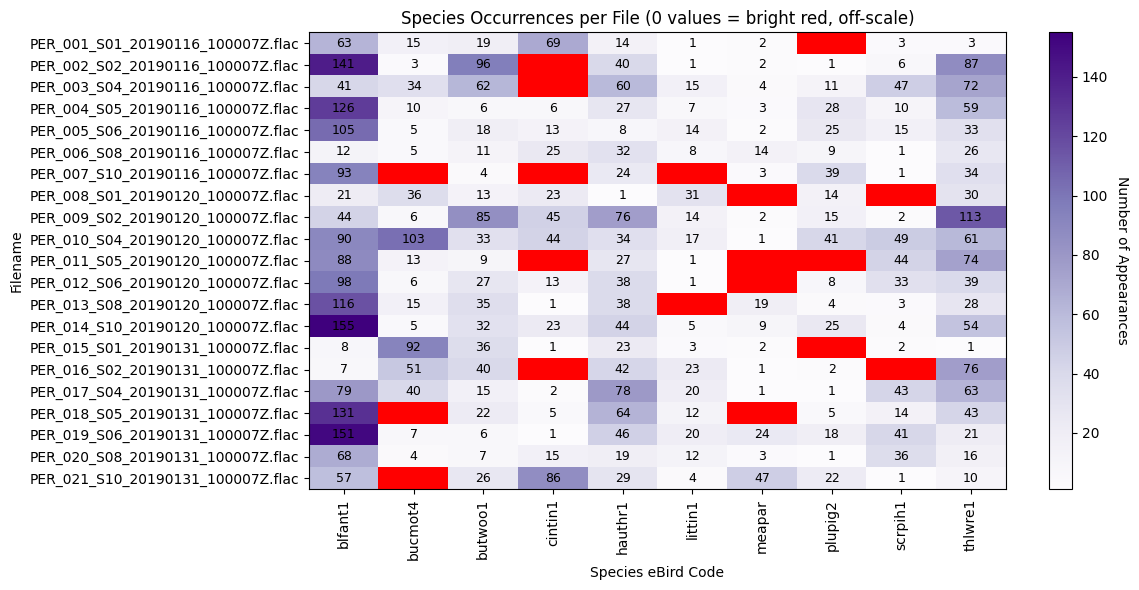

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

species_counts = annotations["Species eBird Code"].value_counts()

#selected_species = species_counts[species_counts >= 150].index

selected_species = chosen_birds

filtered_df = annotations[annotations["Species eBird Code"].isin(selected_species)]

counts = (
    filtered_df.groupby(["Filename", "Species eBird Code"])
    .size()
    .unstack(fill_value=0)
)

data = counts.values

zero_mask = (data == 0).astype(float)

plt.figure(figsize=(12, 6))

plt.imshow(zero_mask, cmap=mcolors.ListedColormap(['white', 'red']),
           aspect='auto', interpolation='none')

masked_data = np.ma.masked_where(data == 0, data)

plt.imshow(masked_data, cmap='Purples', aspect='auto',
           interpolation='none', norm=mcolors.Normalize(vmin=1, vmax=data.max()))

plt.title("Species Occurrences per File (0 values = bright red, off-scale)")
plt.xlabel("Species eBird Code")
plt.ylabel("Filename")

plt.xticks(np.arange(len(counts.columns)), counts.columns, rotation=90)
plt.yticks(np.arange(len(counts.index)), counts.index)

cbar = plt.colorbar(label="Number of Appearances (nonzero only)")
cbar.ax.set_ylabel("Number of Appearances", rotation=270, labelpad=15)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] > 0:
            plt.text(
                j, i,
                str(data[i, j]),
                ha='center', va='center',
                color='black',
                fontsize=9
            )

plt.tight_layout()
plt.show()


'PER_008_S01_20190120_100007Z.flac' 
'PER_002_S02_20190116_100007Z.flac' 
'PER_003_S04_20190116_100007Z.flac'
'PER_004_S05_20190116_100007Z.flac'
'PER_005_S06_20190116_100007Z.flac'
'PER_006_S08_20190116_100007Z.flac'
'PER_007_S10_20190116_100007Z.flac'
'PER_008_S01_20190120_100007Z.flac'
'PER_009_S02_20190120_100007Z.flac'
'PER_010_S04_20190120_100007Z.flac'
'PER_011_S05_20190120_100007Z.flac'
'PER_012_S06_20190120_100007Z.flac'
'PER_013_S08_20190120_100007Z.flac'
'PER_014_S10_20190120_100007Z.flac'
'PER_015_S01_20190131_100007Z.flac'
'PER_016_S02_20190131_100007Z.flac'
'PER_017_S04_20190131_100007Z.flac'
'PER_018_S05_20190131_100007Z.flac'
'PER_019_S06_20190131_100007Z.flac'
'PER_020_S08_20190131_100007Z.flac'
'PER_021_S10_20190131_100007Z.flac'

In [13]:
counts = (
    filtered_df.groupby(["Species eBird Code", "Filename"])
      .size()
      .reset_index(name="count")
)

totals = (
    filtered_df.groupby("Species eBird Code")
      .size()
      .reset_index(name="total_count")
)

eligible = counts[counts["count"] >= 20]

val_selection = (
    eligible.loc[eligible.groupby("Species eBird Code")["count"].idxmin()]
    .sort_values("Species eBird Code")
)

val_selection = val_selection.merge(totals, on="Species eBird Code", how="left")
val_selection["percent_of_total"] = 100 * val_selection["count"] / val_selection["total_count"]

val_selection = val_selection.sort_values("percent_of_total")
val_selection[["Species eBird Code", "Filename", "count", "total_count", "percent_of_total"]]


,Species eBird Code,Filename,count,total_count,percent_of_total
1,blfant1,PER_008_S01_20190120_100007Z.flac,21,1694,1.239669
25,thlwre1,PER_019_S06_20190131_100007Z.flac,21,943,2.226935
15,hauthr1,PER_015_S01_20190131_100007Z.flac,23,764,3.010471
5,butwoo1,PER_018_S05_20190131_100007Z.flac,22,602,3.654485
3,bubwre1,PER_007_S10_20190116_100007Z.flac,30,570,5.263158
17,pluant1,PER_014_S10_20190120_100007Z.flac,23,432,5.324074
6,cintin1,PER_008_S01_20190120_100007Z.flac,23,372,6.182796
26,undtin1,PER_015_S01_20190131_100007Z.flac,37,509,7.269155
4,bucmot4,PER_003_S04_20190116_100007Z.flac,34,450,7.555556
8,coltro1,PER_016_S02_20190131_100007Z.flac,20,247,8.097166


In [38]:
val_lookup = dict(zip(val_selection["Species eBird Code"], val_selection["Filename"]))

def assign_split(row):
    if val_lookup.get(row["Species eBird Code"]) == row["Filename"]:
        return "val"
    else:
        return "train"

filtered_df["where"] = filtered_df.apply(assign_split, axis=1)

filtered_10 = filtered_df[filtered_df["Duration"] <= 10]

filtered_10.to_csv("annotations_divided_cap10.csv", index=False)

print("Saved: annotations_divided.csv")
print(filtered_10["where"].value_counts())

Saved: annotations_divided.csv
where
train    9147
val      1171
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

def split_long_samples(df, n=10.0,
                       start_col="Start Time (s)",
                       end_col="End Time (s)",
                       keep_short=True):
    if n <= 0:
        raise ValueError("n must be > 0")

    out_rows = []

    for idx, row in df.iterrows():
        s = float(row[start_col])
        e = float(row[end_col])

        if not np.isfinite(s) or not np.isfinite(e) or e <= s:
            continue

        dur = e - s

        # keep short samples unchanged (optional)
        if keep_short and dur <= n:
            new = row.copy()
            new[start_col] = s
            new[end_col] = e
            new["Duration"] = dur
            new["orig_row"] = idx
            new["part"] = 0
            new["parts_total"] = 1
            out_rows.append(new)
            continue

        r = int(np.ceil(dur / n))          # number of parts

        # Use linspace to avoid drift and guarantee last boundary == e
        boundaries = np.linspace(s, e, r + 1)

        for part in range(r):
            seg_start = float(boundaries[part])
            seg_end = float(boundaries[part + 1])

            new = row.copy()
            new[start_col] = seg_start
            new[end_col] = seg_end
            new["Duration"] = seg_end - seg_start
            new["orig_row"] = idx
            new["part"] = part
            new["parts_total"] = r
            out_rows.append(new)

    return pd.DataFrame(out_rows).reset_index(drop=True)

In [8]:
import numpy as np

filtered_df = annotations[annotations["Species eBird Code"].isin(chosen_birds)].copy()

CAP_N = 5.0
filtered_cap = split_long_samples(filtered_df, n=CAP_N)

val_files = {
    "PER_001_S01_20190116_100007Z.flac",
    "PER_019_S06_20190131_100007Z.flac",
}

filtered_cap["where"] = np.where(filtered_cap["Filename"].isin(val_files), "val", "train")
filtered_df["where"]  = np.where(filtered_df["Filename"].isin(val_files), "val", "train")

train_only = filtered_cap[filtered_cap["where"] == "train"].copy()
val_only   = filtered_cap[filtered_cap["where"] == "val"].copy()

filtered_cap.to_csv("annotations_2.0_cap5.0_split.csv", index=False)
filtered_df.to_csv("annotations_2.0_nocap_split.csv", index=False)
#train_only.to_csv("annotations_2.0_cap5.0_trainonly.csv", index=False)
#val_only.to_csv("annotations_2.0_cap5.0_valonly.csv", index=False)

print("Mixed split (cap):\n", filtered_cap["where"].value_counts())
print("Mixed split (nocap):\n", filtered_df["where"].value_counts())
print("Train-only rows:", len(train_only))
print("Val-only rows:", len(val_only))
print("Val files used:", len(val_files))


Mixed split (cap):
 where
train    13663
val       1454
Name: count, dtype: int64
Mixed split (nocap):
 where
train    5273
val       524
Name: count, dtype: int64
Train-only rows: 13663
Val-only rows: 1454
Val files used: 2


In [28]:
import json

annotations = pd.read_csv("data/soundscape_recordings_amazon/annotations_divided.csv")
species_list = sorted(annotations["Species eBird Code"].unique())

label_to_idx = {label: i for i, label in enumerate(species_list)}
idx_to_label = {i: label for label, i in label_to_idx.items()}

encodings = {
    "label_to_idx": label_to_idx,
    "idx_to_label": idx_to_label
}

with open("data/soundscape_recordings_amazon/label_encodings.json", "w") as f:
    json.dump(encodings, f, indent=2)

print(f"Saved {len(label_to_idx)} label_encodings.json")

Saved 28 label_encodings.json


In [29]:
annotations["Duration"] = annotations["End Time (s)"] - annotations["Start Time (s)"]
annotations["Bandwidth"] = annotations["High Freq (Hz)"] - annotations["Low Freq (Hz)"]

print(f"\nOverall:")
print(f"rows: {len(annotations)}")
print(f"unique classes: {annotations['Species eBird Code'].nunique()}")
print(f"total duration: {annotations['Duration'].sum()/3600:.2f} h")
print(f"low freq range: {annotations['Low Freq (Hz)'].min():.0f}–{annotations['Low Freq (Hz)'].max():.0f} Hz")
print(f"high freq range: {annotations['High Freq (Hz)'].min():.0f}–{annotations['High Freq (Hz)'].max():.0f} Hz")
print(f"bandwidth median(IQR): {annotations['Bandwidth'].median():.0f} "
      f"({annotations['Bandwidth'].quantile(0.25):.0f}–{annotations['Bandwidth'].quantile(0.75):.0f}) Hz")



Overall:
rows: 11563
unique classes: 28
total duration: 24.30 h
low freq range: 0–3189 Hz
high freq range: 476–5613 Hz
bandwidth median(IQR): 1253 (794–1929) Hz


In [37]:
import pandas as pd

# Compute duration if not already present
filtered_df["Duration"] = filtered_df["End Time (s)"] - filtered_df["Start Time (s)"]

# Count before filtering (per species)
before = (
    filtered_df.groupby("Species eBird Code")["Duration"]
    .count()
    .reset_index(name="Count_before")
)

# Apply the <=10 s filter
filtered_10 = filtered_df[filtered_df["Duration"] <= 10]

# Count after filtering (per species)
after = (
    filtered_10.groupby("Species eBird Code")["Duration"]
    .count()
    .reset_index(name="Count_after")
)

# Merge both tables
diff = pd.merge(before, after, on="Species eBird Code", how="left").fillna(0)

# Compute difference and % retained
diff["Removed"] = diff["Count_before"] - diff["Count_after"]
diff["Retained_%"] = 100 * diff["Count_after"] / diff["Count_before"]

# Sort by how many were removed
diff = diff.sort_values("Removed", ascending=False)

print(diff.head(20))

   Species eBird Code  Count_before  Count_after  Removed  Retained_%
15            hauthr1           764          334      430   43.717277
25            thlwre1           943          806      137   85.471898
3             bubwre1           570          478       92   83.859649
23            spwant2           158           84       74   53.164557
22            scrpih1           355          292       63   82.253521
16            littin1           209          147       62   70.334928
18            plupig2           269          221       48   82.156134
13            grfdov1           307          262       45   85.342020
4             bucmot4           450          409       41   90.888889
6             cintin1           372          333       39   89.516129
9             ducgre1           446          410       36   91.928251
1             blfant1          1694         1659       35   97.933884
27            whwbec1           439          412       27   93.849658
20            ruboro

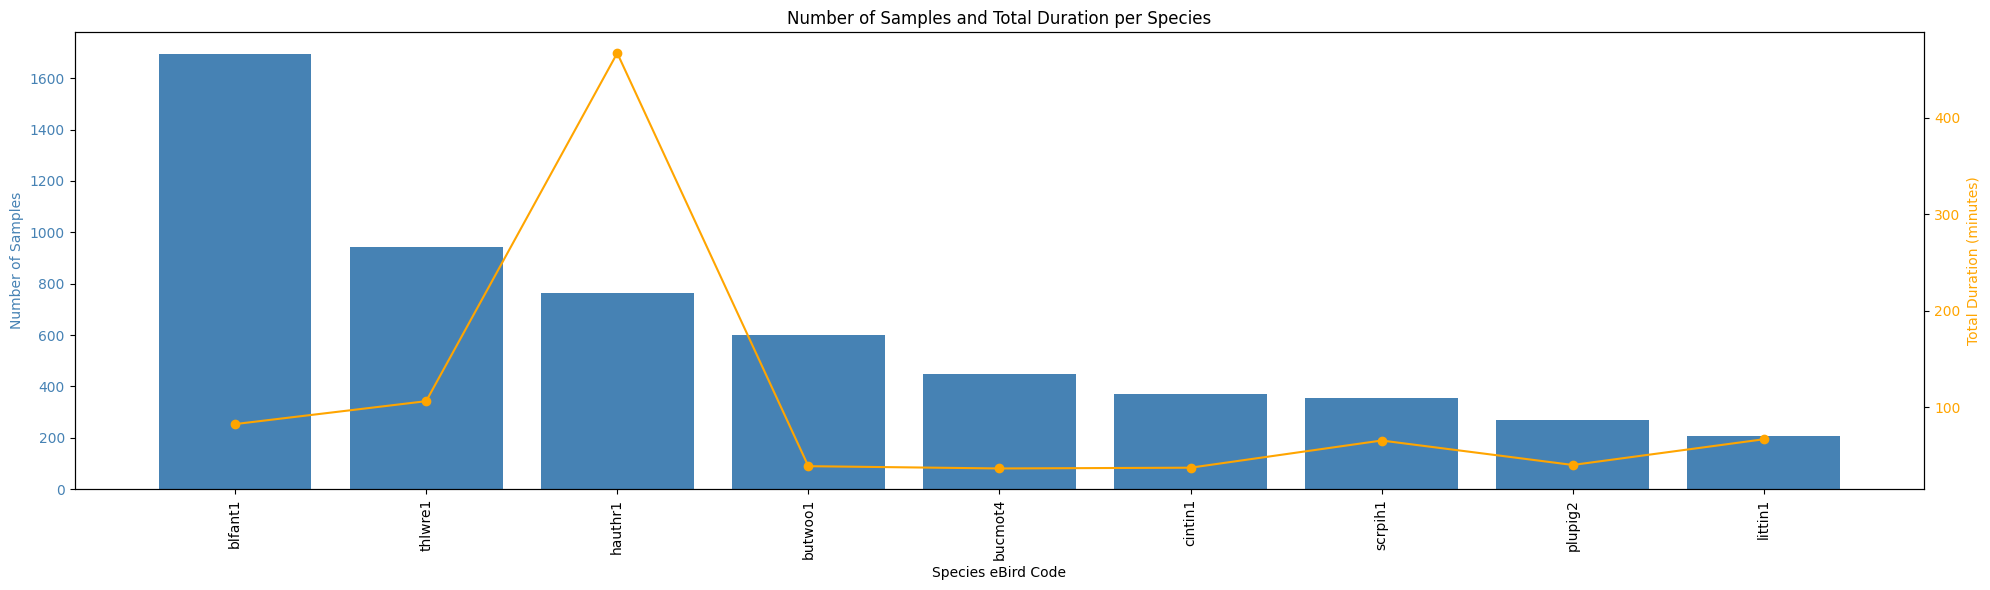

Length of data: 9


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

annotations_plot  = annotations[
    annotations["Species eBird Code"].isin(chosen_birds)
]

# Calculate per-class stats
stats = (
    annotations_plot
    .assign(duration_s=annotations_plot["End Time (s)"] - annotations_plot["Start Time (s)"])
    .groupby("Species eBird Code")
    .agg(
        num_samples=("Species eBird Code", "count"),
        total_duration_s=("duration_s", "sum"),
        avg_duration_s=("duration_s", "mean")
    )
    .sort_values("num_samples", ascending=False)
)


stats = stats[stats['num_samples'] > 150]

fig, ax1 = plt.subplots(figsize=(20, 6))

bars = ax1.bar(stats.index, stats['num_samples'], color='steelblue', label='Number of Samples')
ax1.set_xlabel('Species eBird Code')
ax1.set_ylabel('Number of Samples', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(stats.index, stats['total_duration_s'] / 60, color='orange', marker='o', label='Total Duration (minutes)')
ax2.set_ylabel('Total Duration (minutes)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Number of Samples and Total Duration per Species')
fig.tight_layout()
plt.show()

print(f"Length of data: {len(stats)}")

In [34]:
stats

,num_samples,total_duration_s,avg_duration_s
Species eBird Code,,,
blfant1,1694,4955.0,2.925030
thlwre1,943,6379.6,6.765217
hauthr1,764,28020.5,36.676047
butwoo1,602,2337.4,3.882724
bucmot4,450,2196.4,4.880889
cintin1,372,2243.5,6.030914
scrpih1,355,3933.7,11.080845
plupig2,269,2413.6,8.972491
littin1,209,4012.0,19.196172


In [32]:
stats['num_samples'].sum(), stats['total_duration_s'].sum() / 3600

(np.int64(5658), np.float64(15.692138888888888))

In [ ]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"
#pio.renderers.default = "vscode"

annotations = annotations[annotations.groupby('Species eBird Code')['Filename'].transform('count') > 150]

annotations["Duration"] = annotations["End Time (s)"] - annotations["Start Time (s)"]
annotations["CenterFreq"] = (annotations["Low Freq (Hz)"] + annotations["High Freq (Hz)"]) / 2
annotations["Bandwidth"] = annotations["High Freq (Hz)"] - annotations["Low Freq (Hz)"]

counts = annotations["Species eBird Code"].value_counts().reset_index()
counts.columns = ["Species", "Count"]

px.bar(counts, x="Species", y="Count", title="Event Count per Species").show()
px.histogram(annotations, x="Duration", nbins=30, title="Event Duration Distribution").show()
px.scatter(
    annotations,
    x="Low Freq (Hz)", 
    y="High Freq (Hz)", 
    color="Species eBird Code",
    title="Low vs High Frequency per Event",
    height=1000
).update_traces(marker=dict(size=4)).show()

px.scatter(
    annotations,
    x="CenterFreq",
    y="Bandwidth",
    color="Species eBird Code",
    title="Bandwidth vs Center Frequency",
    height=1000
).update_traces(marker=dict(size=4)).show()

px.scatter(
    annotations,
    x="Duration",
    y="CenterFreq",
    color="Species eBird Code",
    title="CenterFreq vs Duration",
    height=1000
).update_traces(marker=dict(size=4)).show()
